In [1]:
import subprocess, shlex, os
from pathlib import Path

PY = "python"
TRAIN = "/root/Course/final_project/train_transformer.py"

DATA_DIR = "/root/Course/final_project/nmt_data_jieba_100k"
VOCAB_ZH = f"{DATA_DIR}/vocab_zh.json"
VOCAB_EN = f"{DATA_DIR}/vocab_en.json"

def run_tfm(**kw):
    cmd = [
        PY, TRAIN,
        "--data_dir", DATA_DIR,
        "--vocab_zh", VOCAB_ZH,
        "--vocab_en", VOCAB_EN,
        "--epochs", str(kw.get("epochs", 10)),
        "--batch_size", str(kw.get("batch_size", 64)),
        "--lr", str(kw.get("lr", 3e-4)),
        "--d_model", str(kw.get("d_model", 256)),
        "--nhead", str(kw.get("nhead", 4)),
        "--enc_layers", str(kw.get("enc_layers", 3)),
        "--dec_layers", str(kw.get("dec_layers", 3)),
        "--ff", str(kw.get("ff", 1024)),
        "--pos", kw.get("pos", "learned"),
        "--norm", kw.get("norm", "layernorm"),
        "--seed", str(kw.get("seed", 42)),
        "--train_decode", kw.get("train_decode", "greedy"),
        "--final_decode", kw.get("final_decode", "beam"),
        "--final_beam_size", str(kw.get("final_beam_size", 4)),
    ]
    if kw.get("eval_test_each_epoch", False):
        cmd.append("--eval_test_each_epoch")
    print("RUN:", " ".join(map(str, cmd)))
    subprocess.run(cmd, check=True)

In [3]:
run_tfm(
    epochs=10,
    batch_size=64,
    lr=3e-4,
    d_model=256, nhead=4, enc_layers=3, dec_layers=3, ff=1024,
    pos="learned", norm="layernorm",
    train_decode="greedy",
    final_decode="beam", final_beam_size=4,
    seed=42
)


RUN: python /root/Course/final_project/train_transformer.py --data_dir /root/Course/final_project/nmt_data_jieba_100k --vocab_zh /root/Course/final_project/nmt_data_jieba_100k/vocab_zh.json --vocab_en /root/Course/final_project/nmt_data_jieba_100k/vocab_en.json --epochs 10 --batch_size 64 --lr 0.0003 --d_model 256 --nhead 4 --enc_layers 3 --dec_layers 3 --ff 1024 --pos learned --norm layernorm --seed 42 --train_decode greedy --final_decode beam --final_beam_size 4


/root/miniconda3/envs/py311/lib/python3.11/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


[Epoch 1] train_loss=8.9677 valid_BLEU4=0.72
[Epoch 2] train_loss=5.2538 valid_BLEU4=1.00
[Epoch 3] train_loss=4.7630 valid_BLEU4=1.54
[Epoch 4] train_loss=4.4760 valid_BLEU4=1.48
[Epoch 5] train_loss=4.2679 valid_BLEU4=1.20
[Epoch 6] train_loss=4.1030 valid_BLEU4=1.62
[Epoch 7] train_loss=3.9686 valid_BLEU4=2.22
[Epoch 8] train_loss=3.8519 valid_BLEU4=2.08
[Epoch 9] train_loss=3.7510 valid_BLEU4=2.13
[Epoch 10] train_loss=3.6604 valid_BLEU4=2.41
Saved run dir: /root/Course/final_project/nmt_data_jieba_100k/checkpoints/transformer/nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_pos-learned_norm-layernorm_bs64_lr0.0003_seed42_trainDec-greedy
Best: /root/Course/final_project/nmt_data_jieba_100k/checkpoints/transformer/nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_pos-learned_norm-layernorm_bs64_lr0.0003_seed42_trainDec-greedy/best.pt
Last: /root/Course/final_project/nmt_data_jieba_100k/checkpoints/transformer/nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_pos-learned_norm-layernorm_bs64_lr0.00

In [5]:
for pos in ["learned", "sinusoidal"]:
    for norm in ["layernorm", "rmsnorm"]:
        run_tfm(
            epochs=10,
            batch_size=64,
            lr=3e-4,
            d_model=256, nhead=4, enc_layers=3, dec_layers=3, ff=1024,
            pos=pos, norm=norm,
            train_decode="greedy",
            final_decode="beam", final_beam_size=4,
            seed=42
        )


RUN: python /root/Course/final_project/train_transformer.py --data_dir /root/Course/final_project/nmt_data_jieba_100k --vocab_zh /root/Course/final_project/nmt_data_jieba_100k/vocab_zh.json --vocab_en /root/Course/final_project/nmt_data_jieba_100k/vocab_en.json --epochs 10 --batch_size 64 --lr 0.0003 --d_model 256 --nhead 4 --enc_layers 3 --dec_layers 3 --ff 1024 --pos learned --norm layernorm --seed 42 --train_decode greedy --final_decode beam --final_beam_size 4
[Epoch 1] train_loss=8.8816 valid_BLEU4=0.94
[Epoch 2] train_loss=5.2602 valid_BLEU4=1.36
[Epoch 3] train_loss=4.7811 valid_BLEU4=1.79
[Epoch 4] train_loss=4.4917 valid_BLEU4=1.61
[Epoch 5] train_loss=4.2821 valid_BLEU4=1.53
[Epoch 6] train_loss=4.1167 valid_BLEU4=1.42
[Epoch 7] train_loss=3.9790 valid_BLEU4=1.92
[Epoch 8] train_loss=3.8597 valid_BLEU4=2.38
[Epoch 9] train_loss=3.7558 valid_BLEU4=2.23
[Epoch 10] train_loss=3.6633 valid_BLEU4=2.27
Saved run dir: /root/Course/final_project/nmt_data_jieba_100k/checkpoints/transf

In [6]:
import json
import pandas as pd
from pathlib import Path

CKPT_ROOT = Path(DATA_DIR) / "checkpoints" / "transformer"

def load_tfm_summaries():
    rows = []
    for run in CKPT_ROOT.iterdir():
        sp = run / "summary.json"
        cp = run / "config.json"
        if not (sp.exists() and cp.exists()):
            continue
        s = json.load(open(sp, "r", encoding="utf-8"))
        c = json.load(open(cp, "r", encoding="utf-8"))

        rows.append({
            "run": run.name,
            "pos": c.get("pos"),
            "norm": c.get("norm"),
            "d_model": c.get("d_model"),
            "layers": f'{c.get("enc_layers")}-{c.get("dec_layers")}',
            "batch": c.get("batch_size"),
            "lr": c.get("lr"),
            "seed": c.get("seed"),
            "monitor_decode": c.get("train_decode"),
            "beam": c.get("final_beam_size"),

            # 监控 BLEU（train_decode）
            "valid_monitor": s.get("best_valid_trainDecode_bleu4"),
            "test_monitor":  s.get("best_test_trainDecode_bleu4"),

            # final decode BLEU（通常 beam）
            "valid_beam": s.get("best_valid_beam_bleu4"),
            "test_beam":  s.get("best_test_beam_bleu4"),
        })
    return pd.DataFrame(rows)

df_tfm = load_tfm_summaries()
df_tfm.sort_values("valid_beam", ascending=False).head(10)


,run,pos,norm,d_model,layers,batch,lr,seed,monitor_decode,beam,valid_monitor,test_monitor,valid_beam,test_beam
0,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...,learned,layernorm,256,3-3,64,0.0003,42,greedy,4,2.382551,2.417311,2.358473,2.540681
3,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...,sinusoidal,rmsnorm,256,3-3,64,0.0003,42,greedy,4,1.823636,1.822626,2.313188,2.268564
2,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...,sinusoidal,layernorm,256,3-3,64,0.0003,42,greedy,4,2.208967,2.421009,2.188723,2.409379
1,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...,learned,rmsnorm,256,3-3,64,0.0003,42,greedy,4,2.303630,1.485908,2.175105,1.590883


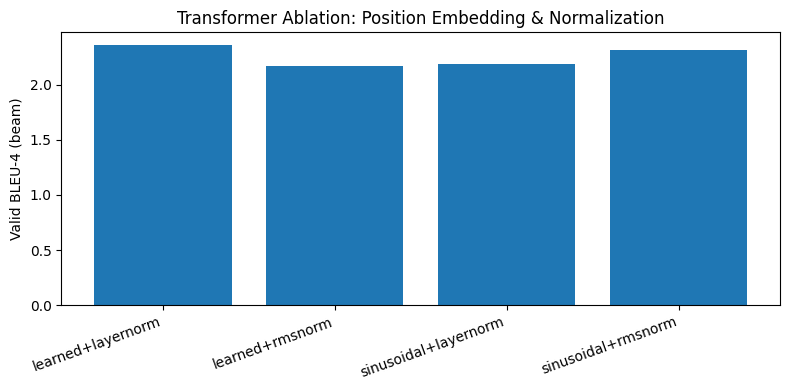

In [7]:
import matplotlib.pyplot as plt

abl = df_tfm[
    (df_tfm["d_model"]==256) &
    (df_tfm["layers"]=="3-3") &
    (df_tfm["batch"]==64) &
    (df_tfm["lr"]==3e-4) &
    (df_tfm["seed"]==42)
].copy()

abl = abl.sort_values(["pos","norm"])
abl["label"] = abl["pos"] + "+" + abl["norm"]

plt.figure(figsize=(8,4))
plt.bar(abl["label"], abl["valid_beam"])
plt.ylabel("Valid BLEU-4 (beam)")
plt.title("Transformer Ablation: Position Embedding & Normalization")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()


In [8]:
import os, json, subprocess, shlex
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

PROJECT_ROOT = Path("/root/Course/final_project")
DATA_DIR = PROJECT_ROOT / "nmt_data_jieba_100k"
TRAIN_SCRIPT = PROJECT_ROOT / "train_transformer.py"

VOCAB_ZH = DATA_DIR / "vocab_zh.json"
VOCAB_EN = DATA_DIR / "vocab_en.json"

CKPT_ROOT = DATA_DIR / "checkpoints" / "transformer"
CKPT_ROOT


PosixPath('/root/Course/final_project/nmt_data_jieba_100k/checkpoints/transformer')

In [9]:
def run_cmd(cmd: str):
    print("RUN:", cmd)
    p = subprocess.run(cmd, shell=True)
    if p.returncode != 0:
        raise RuntimeError(f"Command failed with code {p.returncode}")

def run_tfm_experiment(
    *,
    epochs=10,
    batch_size=64,
    lr=3e-4,
    d_model=256,
    nhead=4,
    enc_layers=3,
    dec_layers=3,
    ff=1024,
    pos="learned",
    norm="layernorm",
    seed=42,
    train_decode="greedy",
    beam_size=4,
    final_decode="beam",
    final_beam_size=4,
    extra_args=None,
):
    extra_args = extra_args or []
    cmd = f"""
    python {shlex.quote(str(TRAIN_SCRIPT))} \
      --data_dir {shlex.quote(str(DATA_DIR))} \
      --vocab_zh {shlex.quote(str(VOCAB_ZH))} \
      --vocab_en {shlex.quote(str(VOCAB_EN))} \
      --epochs {epochs} --batch_size {batch_size} --lr {lr} \
      --d_model {d_model} --nhead {nhead} --enc_layers {enc_layers} --dec_layers {dec_layers} --ff {ff} \
      --pos {pos} --norm {norm} \
      --seed {seed} \
      --train_decode {train_decode} --beam_size {beam_size} \
      --final_decode {final_decode} --final_beam_size {final_beam_size} \
      {" ".join(extra_args)}
    """
    run_cmd(" ".join(cmd.split()))


In [10]:
def _safe_read_json(p: Path):
    try:
        return json.load(open(p, "r", encoding="utf-8"))
    except Exception:
        return None

def load_tfm_summaries(ckpt_root: Path = CKPT_ROOT) -> pd.DataFrame:
    rows = []
    if not ckpt_root.exists():
        return pd.DataFrame()

    for run in ckpt_root.iterdir():
        if not run.is_dir():
            continue
        summary_p = run / "summary.json"
        config_p  = run / "config.json"
        log_p     = run / "train_log.csv"
        if not (summary_p.exists() and config_p.exists()):
            continue

        s = _safe_read_json(summary_p) or {}
        c = _safe_read_json(config_p) or {}

        # 从 train_log.csv 算一下总耗时（seconds列）
        total_sec = None
        if log_p.exists():
            try:
                df_log = pd.read_csv(log_p)
                if "seconds" in df_log.columns:
                    total_sec = float(df_log["seconds"].sum())
            except Exception:
                total_sec = None

        # 兼容你现在的 summary schema（没有 final_valid_bleu4）
        # 你现在 summary 里更像是：
        # best_valid_trainDecode_bleu4 / best_test_trainDecode_bleu4 / best_valid_beam_bleu4 / best_test_beam_bleu4
        row = {
            "run": run.name,

            "pos": c.get("pos"),
            "norm": c.get("norm"),
            "epochs": c.get("epochs"),
            "batch": c.get("batch_size"),
            "lr": c.get("lr"),
            "d_model": c.get("d_model"),
            "nhead": c.get("nhead"),
            "enc_layers": c.get("enc_layers"),
            "dec_layers": c.get("dec_layers"),
            "ff": c.get("ff"),
            "seed": c.get("seed"),

            "train_decode": s.get("train_decode", c.get("train_decode")),
            "final_decode": s.get("final_decode", c.get("final_decode")),
            "beam_size": s.get("beam_size", c.get("beam_size")),
            "final_beam_size": s.get("final_beam_size", c.get("final_beam_size")),

            "valid_greedy": s.get("best_valid_trainDecode_bleu4"),
            "test_greedy":  s.get("best_test_trainDecode_bleu4"),

            # 如果 final_decode=beam，会有 best_valid_beam_bleu4 / best_test_beam_bleu4
            "valid_beam": s.get("best_valid_beam_bleu4"),
            "test_beam":  s.get("best_test_beam_bleu4"),

            "total_train_seconds": total_sec,
        }
        row["layers"] = f"{row['enc_layers']}-{row['dec_layers']}"
        rows.append(row)

    df = pd.DataFrame(rows)
    if len(df) == 0:
        return df

    # 数值列转 float，避免画图时出问题
    for col in ["valid_greedy","test_greedy","valid_beam","test_beam","total_train_seconds","lr"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    return df.sort_values(["d_model","layers","batch","lr","pos","norm","seed","run"])


In [11]:
df = load_tfm_summaries()
df[["run","pos","norm","batch","lr","d_model","layers","valid_greedy","valid_beam","total_train_seconds"]].tail(20)


,run,pos,norm,batch,lr,d_model,layers,valid_greedy,valid_beam,total_train_seconds
0,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...,learned,layernorm,64,0.0003,256,3-3,2.382551,2.358473,842.09
1,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...,learned,rmsnorm,64,0.0003,256,3-3,2.303630,2.175105,296.41
2,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...,sinusoidal,layernorm,64,0.0003,256,3-3,2.208967,2.188723,264.77
3,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...,sinusoidal,rmsnorm,64,0.0003,256,3-3,1.823636,2.313188,291.41


In [ ]:
BASE_POS  = "learned"   
BASE_NORM = "layernorm" 

BASE_COMMON = dict(
    epochs=10,
    pos=BASE_POS,
    norm=BASE_NORM,
    train_decode="greedy",
    final_decode="beam",
    final_beam_size=4,
    seed=42,
)

In [14]:
lrs = [1e-4, 3e-4, 1e-3, 3e-3]

for lr in lrs:
    run_tfm_experiment(
        **BASE_COMMON,
        batch_size=64,
        lr=lr,
        d_model=256, nhead=4, enc_layers=3, dec_layers=3, ff=1024,
    )


RUN: python /root/Course/final_project/train_transformer.py --data_dir /root/Course/final_project/nmt_data_jieba_100k --vocab_zh /root/Course/final_project/nmt_data_jieba_100k/vocab_zh.json --vocab_en /root/Course/final_project/nmt_data_jieba_100k/vocab_en.json --epochs 10 --batch_size 64 --lr 0.0001 --d_model 256 --nhead 4 --enc_layers 3 --dec_layers 3 --ff 1024 --pos learned --norm layernorm --seed 42 --train_decode greedy --beam_size 4 --final_decode beam --final_beam_size 4
[Epoch 1] train_loss=12.7444 valid_BLEU4=0.30
[Epoch 2] train_loss=6.8229 valid_BLEU4=0.48
[Epoch 3] train_loss=5.8037 valid_BLEU4=0.86
[Epoch 4] train_loss=5.3237 valid_BLEU4=1.13
[Epoch 5] train_loss=5.0342 valid_BLEU4=1.31
[Epoch 6] train_loss=4.8269 valid_BLEU4=1.37
[Epoch 7] train_loss=4.6667 valid_BLEU4=1.58
[Epoch 8] train_loss=4.5328 valid_BLEU4=1.33
[Epoch 9] train_loss=4.4177 valid_BLEU4=1.55
[Epoch 10] train_loss=4.3162 valid_BLEU4=1.64
Saved run dir: /root/Course/final_project/nmt_data_jieba_100k/che

In [15]:
batches = [32, 64, 128, 256]

for bs in batches:
    run_tfm_experiment(
        **BASE_COMMON,
        batch_size=bs,
        lr=3e-4,
        d_model=256, nhead=4, enc_layers=3, dec_layers=3, ff=1024,
    )


RUN: python /root/Course/final_project/train_transformer.py --data_dir /root/Course/final_project/nmt_data_jieba_100k --vocab_zh /root/Course/final_project/nmt_data_jieba_100k/vocab_zh.json --vocab_en /root/Course/final_project/nmt_data_jieba_100k/vocab_en.json --epochs 10 --batch_size 32 --lr 0.0003 --d_model 256 --nhead 4 --enc_layers 3 --dec_layers 3 --ff 1024 --pos learned --norm layernorm --seed 42 --train_decode greedy --beam_size 4 --final_decode beam --final_beam_size 4
[Epoch 1] train_loss=7.8722 valid_BLEU4=0.77
[Epoch 2] train_loss=5.0539 valid_BLEU4=1.60
[Epoch 3] train_loss=4.6346 valid_BLEU4=1.69
[Epoch 4] train_loss=4.3670 valid_BLEU4=1.85
[Epoch 5] train_loss=4.1690 valid_BLEU4=1.64
[Epoch 6] train_loss=4.0090 valid_BLEU4=2.04
[Epoch 7] train_loss=3.8747 valid_BLEU4=1.99
[Epoch 8] train_loss=3.7563 valid_BLEU4=1.84
[Epoch 9] train_loss=3.6494 valid_BLEU4=2.23
[Epoch 10] train_loss=3.5574 valid_BLEU4=2.40
Saved run dir: /root/Course/final_project/nmt_data_jieba_100k/chec

In [16]:
scales = [
    dict(name="small", d_model=128, nhead=4, enc_layers=2, dec_layers=2, ff=512,  batch_size=64),
    dict(name="base",  d_model=256, nhead=4, enc_layers=3, dec_layers=3, ff=1024, batch_size=64),
    dict(name="large", d_model=512, nhead=8, enc_layers=4, dec_layers=4, ff=2048, batch_size=32),  # 大模型先降bs保命
]

for s in scales:
    run_tfm_experiment(
        **BASE_COMMON,
        batch_size=s["batch_size"],
        lr=3e-4,
        d_model=s["d_model"], nhead=s["nhead"], enc_layers=s["enc_layers"], dec_layers=s["dec_layers"], ff=s["ff"],
        # 在 run_name 里已经带 d_model/layers/ff 了，不额外改名也能区分
    )


RUN: python /root/Course/final_project/train_transformer.py --data_dir /root/Course/final_project/nmt_data_jieba_100k --vocab_zh /root/Course/final_project/nmt_data_jieba_100k/vocab_zh.json --vocab_en /root/Course/final_project/nmt_data_jieba_100k/vocab_en.json --epochs 10 --batch_size 64 --lr 0.0003 --d_model 128 --nhead 4 --enc_layers 2 --dec_layers 2 --ff 512 --pos learned --norm layernorm --seed 42 --train_decode greedy --beam_size 4 --final_decode beam --final_beam_size 4
[Epoch 1] train_loss=7.9711 valid_BLEU4=0.00
[Epoch 2] train_loss=5.6135 valid_BLEU4=0.91
[Epoch 3] train_loss=5.2558 valid_BLEU4=1.41
[Epoch 4] train_loss=5.0104 valid_BLEU4=1.32
[Epoch 5] train_loss=4.8220 valid_BLEU4=1.77
[Epoch 6] train_loss=4.6709 valid_BLEU4=1.58
[Epoch 7] train_loss=4.5452 valid_BLEU4=1.75
[Epoch 8] train_loss=4.4393 valid_BLEU4=1.74
[Epoch 9] train_loss=4.3466 valid_BLEU4=1.74
[Epoch 10] train_loss=4.2627 valid_BLEU4=2.03
Saved run dir: /root/Course/final_project/nmt_data_jieba_100k/check

In [17]:
df = load_tfm_summaries()
df.shape, df.head(3)


((12, 22),
                                                   run      pos       norm  \
 10  nmt_data_jieba_100k_tfm_dm128_h4_L2-2_ff512_po...  learned  layernorm   
 7   nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...  learned  layernorm   
 4   nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...  learned  layernorm   
 
     epochs  batch      lr  d_model  nhead  enc_layers  dec_layers  ...  \
 10      10     64  0.0003      128      4           2           2  ...   
 7       10     32  0.0003      256      4           3           3  ...   
 4       10     64  0.0001      256      4           3           3  ...   
 
     train_decode  final_decode beam_size final_beam_size  valid_greedy  \
 10        greedy          beam         4               4      2.025152   
 7         greedy          beam         4               4      2.396580   
 4         greedy          beam         4               4      1.643309   
 
     test_greedy  valid_beam  test_beam  total_train_seconds  layers  


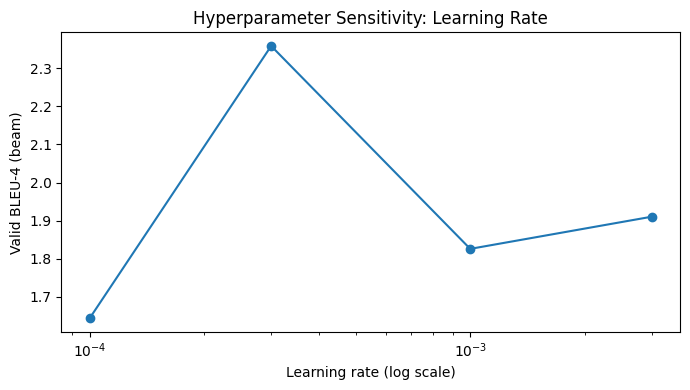

,lr,valid_greedy,valid_beam,total_train_seconds,run
4,0.0001,1.643309,1.643385,269.87,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
0,0.0003,2.382551,2.358473,1654.69,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
5,0.0010,1.977081,1.826078,271.01,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
6,0.0030,1.933075,1.910529,271.12,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...


In [18]:
d1 = df[
    (df["pos"]==BASE_POS) & (df["norm"]==BASE_NORM) &
    (df["d_model"]==256) & (df["layers"]=="3-3") & (df["batch"]==64) &
    (df["seed"]==42)
].copy()

# 只保留这次 lr sweep 的点
d1 = d1[d1["lr"].isin([1e-4,3e-4,1e-3,3e-3])].sort_values("lr")

plt.figure(figsize=(7,4))
plt.plot(d1["lr"], d1["valid_beam"], marker="o")
plt.xscale("log")
plt.xlabel("Learning rate (log scale)")
plt.ylabel("Valid BLEU-4 (beam)")
plt.title("Hyperparameter Sensitivity: Learning Rate")
plt.tight_layout()
plt.show()

d1[["lr","valid_greedy","valid_beam","total_train_seconds","run"]]


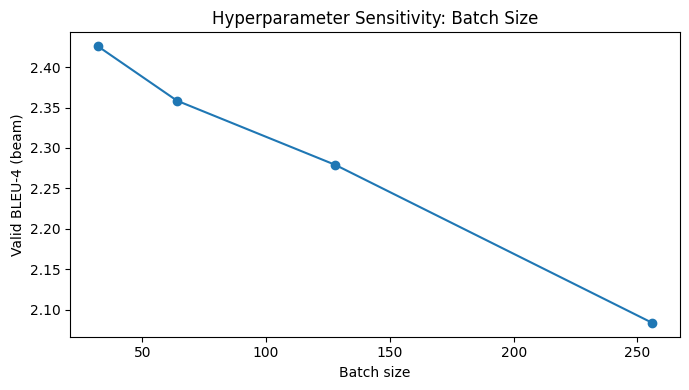

,batch,valid_greedy,valid_beam,total_train_seconds,run
7,32,2.396580,2.425891,424.40,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
0,64,2.382551,2.358473,1654.69,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
8,128,2.371931,2.279020,211.29,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
9,256,1.922781,2.083668,193.72,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...


In [19]:
d2 = df[
    (df["pos"]==BASE_POS) & (df["norm"]==BASE_NORM) &
    (df["d_model"]==256) & (df["layers"]=="3-3") &
    (df["lr"]==3e-4) & (df["seed"]==42)
].copy()

d2 = d2[d2["batch"].isin([32,64,128,256])].sort_values("batch")

plt.figure(figsize=(7,4))
plt.plot(d2["batch"], d2["valid_beam"], marker="o")
plt.xlabel("Batch size")
plt.ylabel("Valid BLEU-4 (beam)")
plt.title("Hyperparameter Sensitivity: Batch Size")
plt.tight_layout()
plt.show()

d2[["batch","valid_greedy","valid_beam","total_train_seconds","run"]]


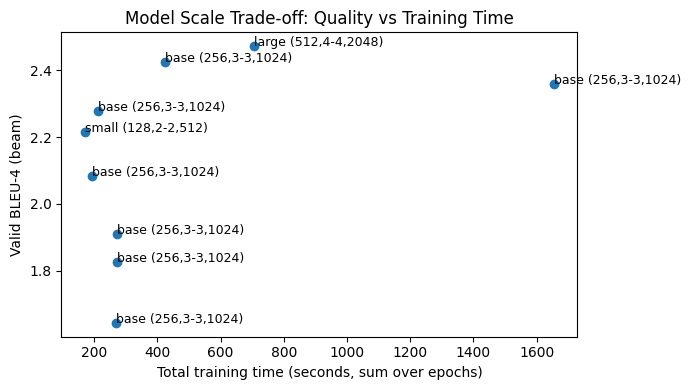

,scale,batch,lr,valid_beam,total_train_seconds,run
10,"small (128,2-2,512)",64,0.0003,2.216492,170.60,nmt_data_jieba_100k_tfm_dm128_h4_L2-2_ff512_po...
7,"base (256,3-3,1024)",32,0.0003,2.425891,424.40,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
4,"base (256,3-3,1024)",64,0.0001,1.643385,269.87,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
0,"base (256,3-3,1024)",64,0.0003,2.358473,1654.69,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
5,"base (256,3-3,1024)",64,0.0010,1.826078,271.01,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
6,"base (256,3-3,1024)",64,0.0030,1.910529,271.12,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
8,"base (256,3-3,1024)",128,0.0003,2.279020,211.29,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
9,"base (256,3-3,1024)",256,0.0003,2.083668,193.72,nmt_data_jieba_100k_tfm_dm256_h4_L3-3_ff1024_p...
11,"large (512,4-4,2048)",32,0.0003,2.472182,707.06,nmt_data_jieba_100k_tfm_dm512_h8_L4-4_ff2048_p...


In [20]:
# 把 scale sweep 的点抓出来（按你设置的三档）
d3 = df[
    (df["pos"]==BASE_POS) & (df["norm"]==BASE_NORM) &
    (df["seed"]==42)
].copy()

# 只筛你定义的三档（避免把别的实验点混进来）
keep = (
    ((d3["d_model"]==128) & (d3["layers"]=="2-2") & (d3["ff"]==512)) |
    ((d3["d_model"]==256) & (d3["layers"]=="3-3") & (d3["ff"]==1024)) |
    ((d3["d_model"]==512) & (d3["layers"]=="4-4") & (d3["ff"]==2048))
)
d3 = d3[keep].copy()

# 加标签
def scale_label(r):
    if r["d_model"]==128: return "small (128,2-2,512)"
    if r["d_model"]==256: return "base (256,3-3,1024)"
    if r["d_model"]==512: return "large (512,4-4,2048)"
    return "?"

d3["scale"] = d3.apply(scale_label, axis=1)

plt.figure(figsize=(7,4))
plt.scatter(d3["total_train_seconds"], d3["valid_beam"])
for _, r in d3.iterrows():
    plt.text(r["total_train_seconds"], r["valid_beam"], r["scale"], fontsize=9)

plt.xlabel("Total training time (seconds, sum over epochs)")
plt.ylabel("Valid BLEU-4 (beam)")
plt.title("Model Scale Trade-off: Quality vs Training Time")
plt.tight_layout()
plt.show()

d3[["scale","batch","lr","valid_beam","total_train_seconds","run"]]
